<a href="https://colab.research.google.com/github/benigmatic/Machine-learning-and-Data-vizualization/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. I
Import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
# for machine learning
import sklearn
import missingno as msno

1. II 
import the data to a dataframe and show the count of rows and columns

In [ ]:
df = pd.read_csv('ecommarce.csv')
df.shape

(500, 9)

1. III Show the top 5 and last 5 rows

In [ ]:
df.head(5)

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",3544288738428794,35.497268,13.655651,40.577668,4.582621,588.951054
1,1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",6546228325389133,32.926272,12.109461,38.268959,3.164034,393.204933
2,2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",4406395951712628314,34.000915,12.330278,38.110597,4.604543,488.547505
3,3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",30334036663133,35.305557,14.717514,37.721283,3.620179,582.852344
4,4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",3582080469154498,34.330673,13.795189,38.536653,4.946308,600.406092


In [ ]:
df.tail(5)

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,495,xskz@gwj.com,"7083 Wallace Rest\nNew Trevor, NM 70240",30206742023085,34.237660,14.566160,37.417985,4.246573,574.847438
496,496,awrc@iok.com,"663 Christopher Garden\nLake Carrieberg, PA 70796",6011536844623717,35.702529,12.695736,38.190268,4.076526,530.049004
497,497,pndt@jyr.com,"1555 Chen Road\nBergerchester, NH 46418",4086276267550896697,33.646777,12.499409,39.332576,5.458264,552.620145
498,498,zvtz@onj.com,"5568 Robert Station Apt. 030\nTurnerstad, GA 9...",36218092488069,34.322501,13.391423,37.840086,2.836485,457.469510
499,499,phqb@nlg.com,"424 Mark Junctions\nDarrellchester, TX 09088",5427200269739116,34.715981,13.418808,36.771016,3.235160,498.778642


1. IV
call the describe method of dataframe to see some summary statistics of the numerical columns. 

In [ ]:
df.describe()

,Unnamed: 0,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,3.706324e+17,34.053194,13.052488,38.060445,4.033462,500.314038
std,144.481833,1.235588e+18,0.992563,0.994216,1.010489,0.999278,79.314782
min,0.000000,5.018057e+11,30.532429,9.508152,34.913847,0.769901,257.670582
25%,124.750000,3.683275e+13,33.341822,12.388153,37.349257,3.430450,446.038277
50%,249.500000,3.513612e+15,34.082008,12.983231,38.069367,4.033975,499.887875
75%,374.250000,4.777131e+15,34.711985,13.753850,38.716432,4.626502,550.313828
max,499.000000,4.959148e+18,37.139662,16.126994,41.005182,7.422689,766.518462


1. V.
Show any missing value analysis
No missing values

In [ ]:
missingdf = df.isnull().sum().to_frame("null")
missingdf.sort_values("null", inplace = True, ascending = False)
for index, row in missingdf.iterrows():
    print(index, row[0])

Unnamed: 0 0
Email 0
Address 0
Credit Card 0
Avg. Session Length 0
Time on App 0
Time on Website 0
Length of Membership 0
Yearly Amount Spent 0


### 1. VI. Plot various scatter plots to understand the data:

    1. Yearly amount Spent vs Time on Website
    2. Yearly amount Spent vs Time on App
    3. Length of membership vs Time on App
    4. Generate sns pairplot. Based on the plots, what feature is mostly correlated with the yearly amount spent?
    5. Also, plot sns heatmpa based on correlation with annot=True and discuss which columns must be removed based on that and which column is mostly interesting and related to Yearly Amount Spent?
    6. Generate a scatter plot with the interesting column you found in the last step against the Yearly Amount Spent


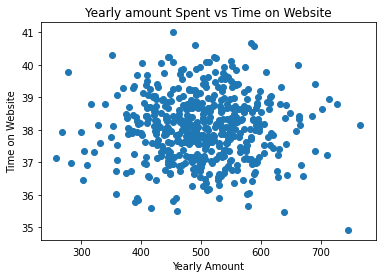

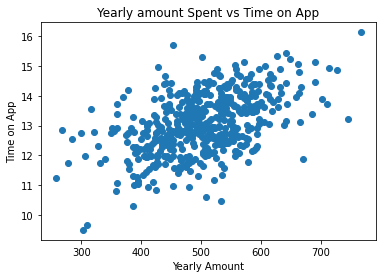

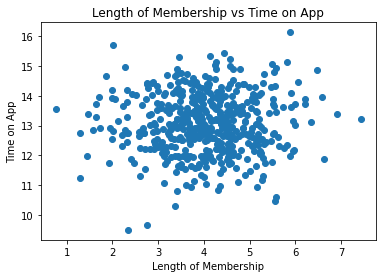

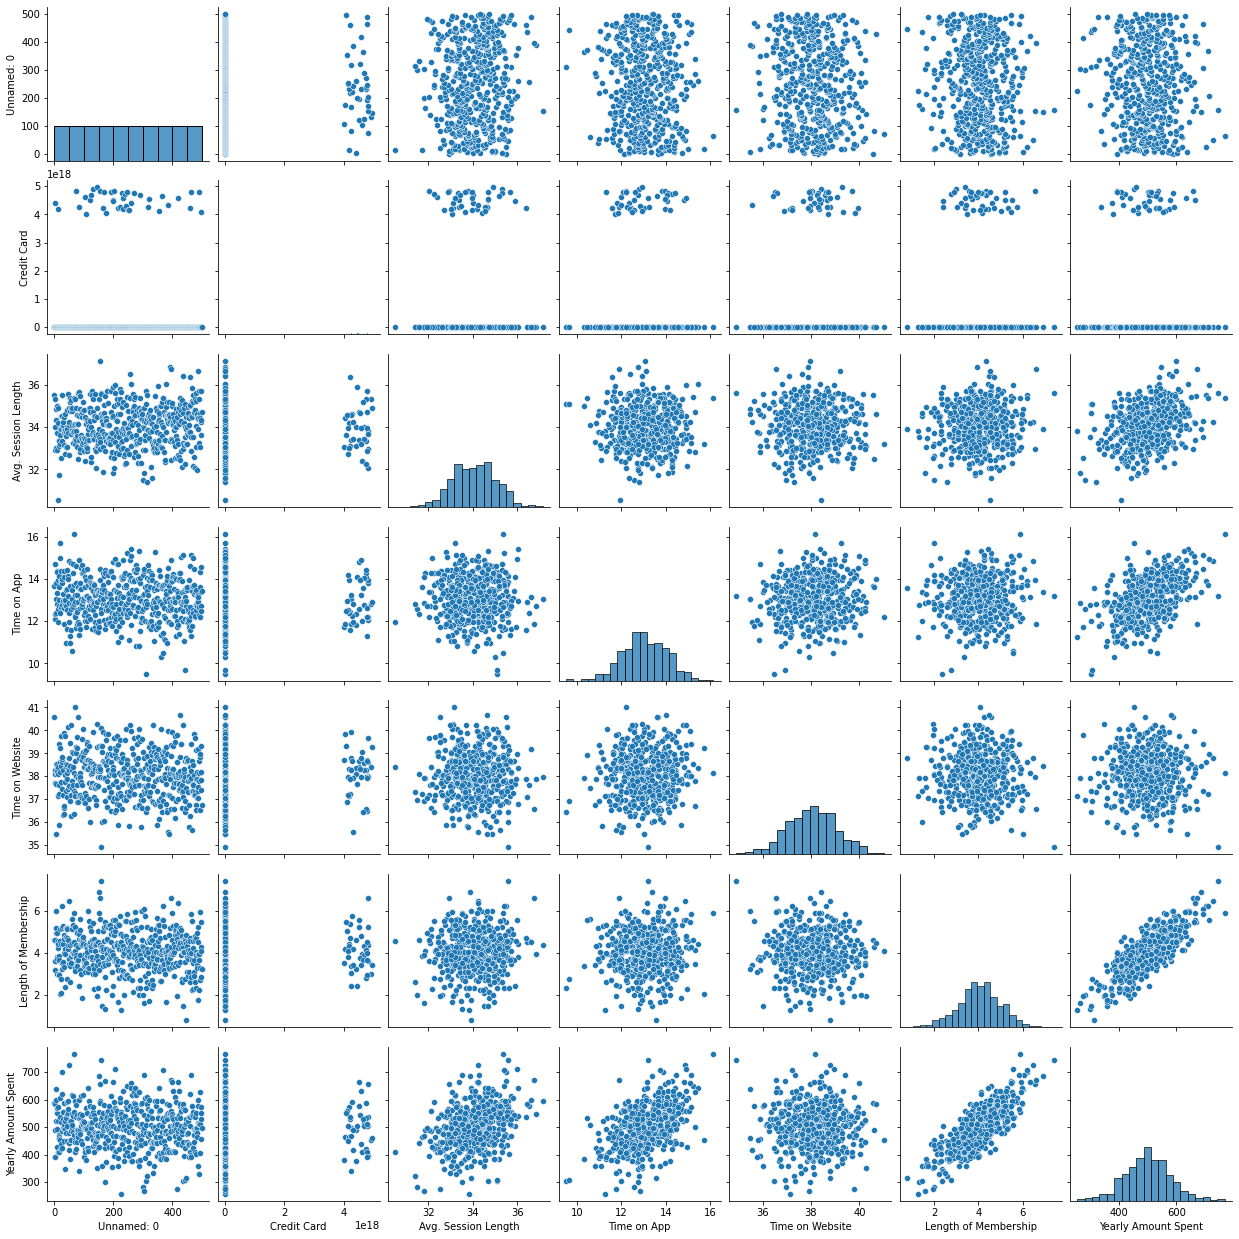

In [ ]:
#1 
plt.scatter(df["Yearly Amount Spent"], df["Time on Website"])
plt.title("Yearly amount Spent vs Time on Website")
plt.xlabel("Yearly Amount")
plt.ylabel("Time on Website")
plt.show()
#2
plt.scatter(df["Yearly Amount Spent"], df["Time on App"])
plt.title("Yearly amount Spent vs Time on App")
plt.xlabel("Yearly Amount")
plt.ylabel("Time on App")
plt.show()
#3
plt.scatter(df["Length of Membership"], df["Time on App"])
plt.title("Length of Membership vs Time on App")
plt.xlabel("Length of Membership")
plt.ylabel("Time on App")
plt.show()
#4
sns.pairplot(df)
plt.show()

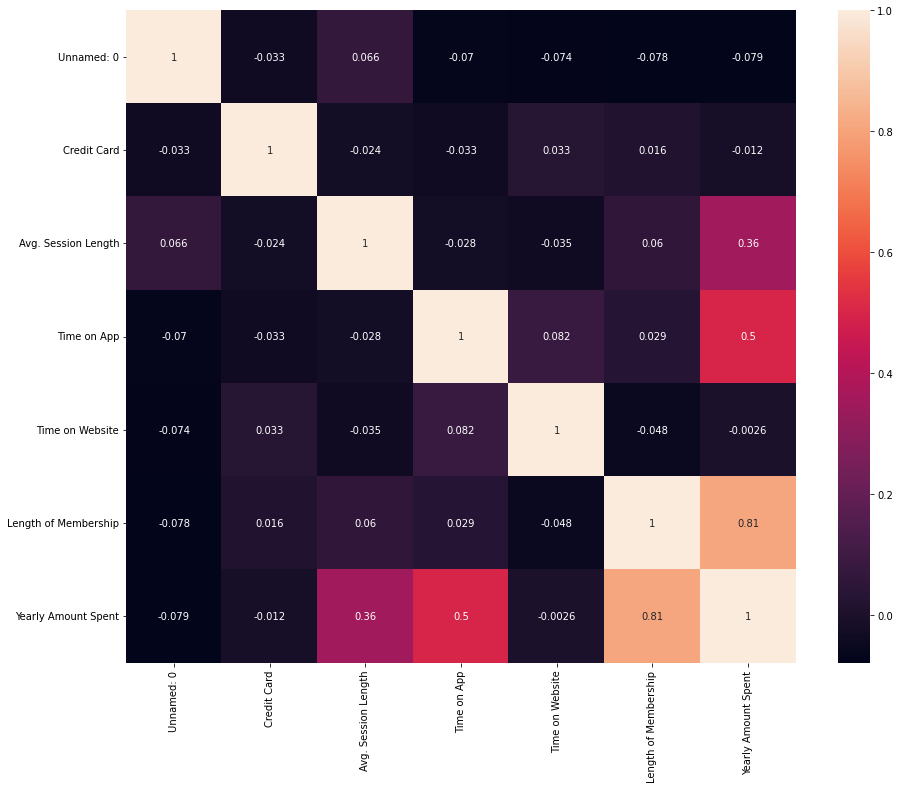

In [ ]:
#5
num_features = df.select_dtypes(include = [np.number])
correlation = num_features.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(correlation, annot=True)

1. VI.
Generate a scatter plot with the interesting column you found in the last step against the Yearly Amount Spent

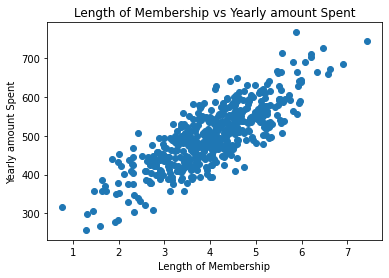

In [ ]:
plt.scatter(num_features["Length of Membership"], num_features["Yearly Amount Spent"])
plt.title("Length of Membership vs Yearly amount Spent")
plt.xlabel("Length of Membership")
plt.ylabel("Yearly amount Spent")
plt.show()

# 2.   Feature Selection and Pre-processing
### I.Based on the EDA and null analysis, drop the unnecessary columns for the regression

In [ ]:
# Credit card numbers were dropeed because the might negatively affect the efficiancy of the algorithms 
#as they don't hold any valuable information for the ML algorithms
num_features = num_features.drop(columns = ["Length of Membership","Unnamed: 0", "Credit Card"], axis =1)
#Check
num_features.head()

,Avg. Session Length,Time on App,Time on Website,Yearly Amount Spent
0,35.497268,13.655651,40.577668,588.951054
1,32.926272,12.109461,38.268959,393.204933
2,34.000915,12.330278,38.110597,488.547505
3,35.305557,14.717514,37.721283,582.852344
4,34.330673,13.795189,38.536653,600.406092


# 3. X/Y and Training/Test Split
 I. Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 101 

In [ ]:
from sklearn.model_selection import train_test_split
y = num_features["Yearly Amount Spent"]
Y=y
X = num_features.drop(columns= ["Yearly Amount Spent"], axis = 1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=101)

print(y_train)
print(X_train)


202    444.965627
428    557.298141
392    550.131573
86     488.379306
443    562.516532
          ...    
63     484.159721
326    506.230068
337    441.002748
11     523.337405
351    534.396554
Name: Yearly Amount Spent, Length: 350, dtype: float64
     Avg. Session Length  Time on App  Time on Website
202            32.525752    12.340036        38.039514
428            32.862741    15.039867        38.022269
392            34.258238    12.514949        38.128039
86             34.877779    13.517666        38.151921
443            34.025020    13.504220        38.645839
..                   ...          ...              ...
63             33.789773    12.670066        38.408748
326            34.217188    11.999684        39.442767
337            32.827979    13.461147        38.428997
11             34.879361    12.584783        38.087926
351            33.189845    12.386776        39.197483

[350 rows x 3 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4.Training Linear Model using SKLearn's LinearRegression 
I. Train a linear model using Sklearn''s LinearRegression 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
# for 12.1
train_errors = lr.fit(X_train_scaled, y_train).score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


II. After training, show the coefficients and intercept

In [ ]:

print("Coefficients: ", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients:  [27.91960372 38.96432363 -3.05418861]
Intercept: 499.7231164913073


III. Predict for the test data

In [ ]:
y_pred = lr.predict(X_test_scaled)
print("Predicted values:",y_pred,sep='\n')

Predicted values:
[582.54442931 397.88947872 408.27656563 537.87327417 495.23407427
 533.57429296 535.77186943 628.25969131 502.49176704 496.29390907
 447.86372406 577.37850399 530.5417805  468.32735273 663.73632115
 507.71701101 568.67912334 512.66959746 581.17104503 564.50841524
 357.25331979 535.11646881 564.82753961 475.465354   518.02588279
 429.13490483 540.06376859 519.31983006 544.99622391 450.6724262
 568.07668098 652.85886155 573.22438615 519.66795785 510.39447345
 499.89398091 468.55417553 473.05069044 539.77871453 511.04067488
 485.26645099 440.68461001 540.82264278 492.39476288 545.97324324
 544.78843066 488.45732467 551.69185184 393.36029919 486.13972783
 466.24569755 513.38579203 424.41403106 469.96603793 439.67946213
 476.76601742 472.23833433 404.90590978 482.96802714 512.99127022
 536.64548192 549.06870225 560.60371227 497.49759329 516.3462644
 425.0964088  482.62094853 493.43195114 530.25195904 459.71316112
 572.28233905 492.18940939 463.1957895  524.30365125 522.258

IV. Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis

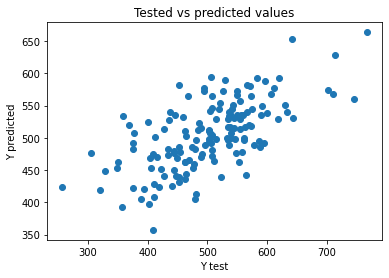

In [ ]:
plt.scatter(y_test, y_pred)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
import math
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()
# for 12.1
val_errors = lr.fit(X_test_scaled, y_test).score(X_test, y_test)

MAE:  48.9351837725051
MSE:  4182.45721148756
RMSE:  64.6719198067257
R2:  0.42380743658529885



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# 5. Normal Equation
I. Implement Normal Equation and find best_theta values based on the training set

In [ ]:
y= np.array(y_train)
y=y.reshape(350,1)
x= X_train_scaled
bias_vector = np.ones((350, 1))
x = np.append(bias_vector, x, axis=1)
# Adding x0=1 xo each instance
step1 = np.dot(x.T, x)
step2 = np.linalg.pinv(step1)
step3 = np.dot(step2, x.T)
# Using Normal Equation.
theta = np.dot(step3, y)



II. Display the theta values

In [ ]:
print(theta)


[[499.72311649]
 [ 27.91960372]
 [ 38.96432363]
 [ -3.05418861]]


III. Prepare the test set before prediction

In [ ]:
y= np.array(y_test)
y=y.reshape(150,1)
x= X_test_scaled
bias_vector = np.ones((150, 1))
x = np.append(bias_vector, x, axis=1)

IV. Perform prediction for the test

In [ ]:
predict_value=x.dot(theta)
#print(predict_value)

V. Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis

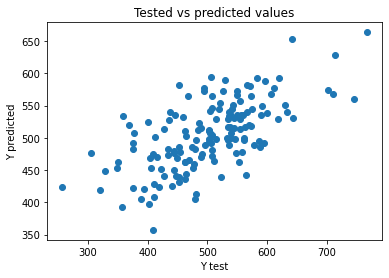

In [ ]:
plt.scatter(y_test, predict_value)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

VI. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
mae = sklearn.metrics.mean_absolute_error(y_test, predict_value)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, predict_value)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, predict_value)
print("R2: ", r2)
print()

MAE:  48.935183772505084
MSE:  4182.45721148756
RMSE:  64.6719198067257
R2:  0.42380743658529885



VII. What is the limitation of using the Normal equation for regression?
Answer: Normal equation for regression is not space, because it computes transposes a lot of times to calulate theta. It is also very slow, because it requires to compute the dot product of matrices several times. 

# 6. Batch Gradient Descent
I. Implement Batch Gradient Descent based on the way we have learned in the class

In [ ]:
cost_list = []
epoch_list = []
predicted_list = []
m=350
eta =0.1
n_iterations = 1000
theta = np.random.randn(4,1)
for iteration in range(n_iterations):
  gradients = 2/m *x.T.dot(x.dot(theta)-y)
  theta = theta - eta * gradients

  y_predicted = np.dot(theta.T, x.T)
  cost = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)

  if iteration%10==0:
      cost_list.append(cost)
      epoch_list.append(iteration)



II. Display the theta values. Are they very close to the sklearn's linear regression?
The values are really close to the results produced by sklearn's regression. 496.52 vs 499.72, 27.919 vs 34.059, 38.9 vs 38.35, and -3.0041 vs -0.7. All of the trends given by the theta values are still the same

In [ ]:
print(theta)

[[496.51902831]
 [ 34.05958622]
 [ 38.35352065]
 [ -0.70342687]]


III.Also plot step number (in x-axis) against the cost(y axis). 

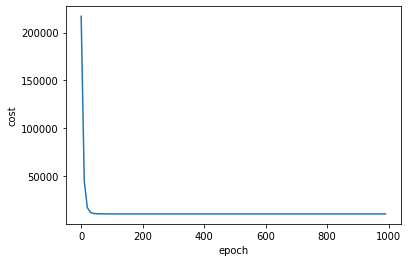

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

IV. Perform Prediction for the test set 

In [ ]:
y_predicted = np.dot(theta.T, x.T)
y_predicted

array([[575.27605788, 394.69065718, 398.09982955, 537.12840953,
        487.86415953, 532.24280427, 523.11338581, 637.82413882,
        506.67564231, 490.1829826 , 440.45805885, 577.34185181,
        526.80572782, 465.06187069, 666.96849069, 499.6739191 ,
        571.28411024, 507.74221716, 579.55954422, 555.10380285,
        334.13902956, 535.84284276, 573.04381441, 468.5501453 ,
        509.95228443, 431.32673942, 536.71132519, 515.18435967,
        538.25984929, 447.49803325, 561.36043107, 661.13875937,
        576.52106438, 522.58904577, 509.07663801, 504.88430118,
        465.21550099, 465.92441083, 537.0780863 , 501.80666131,
        482.73564888, 436.55532847, 540.26730809, 484.21207397,
        551.93431277, 534.80965802, 487.42612194, 549.03821475,
        383.95113334, 472.80323713, 463.17643923, 514.75997989,
        418.90741981, 467.11212791, 443.46750304, 476.37754606,
        469.32845557, 404.34223459, 477.31856067, 509.83242653,
        531.76759786, 549.05429058, 559.

V.Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

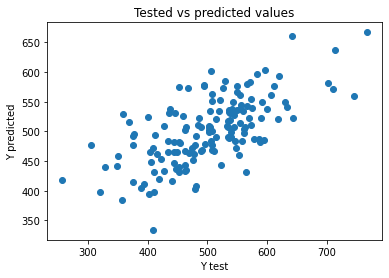

In [ ]:
plt.scatter(y_test, y_predicted)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

VI. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
y_pred = y_predicted.T
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()

MAE:  49.11485337871954
MSE:  4137.250234197129
RMSE:  64.3214601373222
R2:  0.4300353363131574



# 7 Stochastic Gradient Descent
I.Implement Stochastic Gradient Descent and train our data set.

In [ ]:
cost_list = []
epoch_list = []
predicted_list = []
n_epochs = 100
t0, t1=5,50
def learning_schedule(t):
  return t0 / (t+ t1)
theta = np.random.randn(4,1)
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = x[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    #IV
    y_predicted = np.dot(theta.T, x.T)
    cost = np.mean(np.square(y-y_predicted)) # MSE (Mean Squared Error)
        
    if epoch%10==0:
      cost_list.append(cost)
      epoch_list.append(epoch)


In [ ]:
theta

array([[496.48142917],
       [ 35.00357618],
       [ 38.86509751],
       [ -1.12271637]])

III. Also plot step number (in x-axis) against cost(y-axis). 

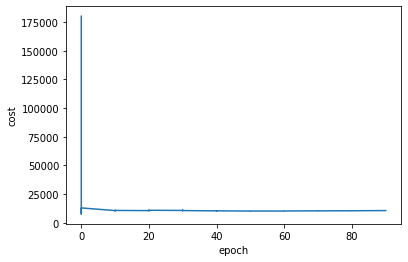

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

IV. Perform Prediction for the test set

In [ ]:
y_predicted = np.dot(theta.T, x.T)
y_predicted

array([[575.38741941, 392.00156446, 395.52953145, 537.58767577,
        487.24824856, 532.70968891, 523.59851659, 640.25104113,
        508.04299441, 489.51406584, 439.26836382, 578.71450597,
        526.23984247, 465.22551625, 669.82932823, 499.75209423,
        573.26469203, 507.56834999, 580.95150876, 555.49620971,
        330.08425441, 537.27483633, 574.07391325, 467.91574659,
        510.34138152, 430.58070956, 537.27398325, 514.62253673,
        538.8563205 , 445.45490287, 561.94068107, 664.15538391,
        578.12299769, 524.34841262, 508.91801639, 504.76801611,
        465.58666303, 465.60973204, 538.0930975 , 501.09020572,
        483.41767074, 434.28818381, 540.31999097, 484.2151487 ,
        553.691423  , 535.48356027, 488.87039752, 549.36865229,
        382.62668249, 472.3393311 , 462.7165135 , 515.22451651,
        418.13604679, 466.65609391, 442.76491632, 476.69008006,
        467.72570006, 402.39912966, 476.13451878, 510.55800068,
        531.5903574 , 550.63212434, 562.

V. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

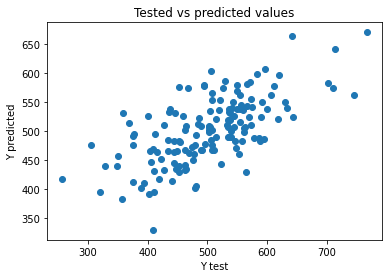

In [ ]:
plt.scatter(y_test, y_predicted)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

VI. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
y_pred = y_predicted.T
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()

MAE:  49.295755964538536
MSE:  4138.797012110022
RMSE:  64.33348282278848
R2:  0.4298222458054496



# 8. SGDRegressor from sklearn
I. Use sklearn's SGDRegressor to train a model for our data set. Put a reasonable iteration and tolerance and learning steps so that we can get coefficients close to normal equation

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1500, tol=1e-3, penalty=None, eta0=0.25)
sgd_reg.fit(x, y.ravel())


SGDRegressor(eta0=0.25, max_iter=1500, penalty=None)

II. Display the theta values. Are they very close to sklearn's linear regression?

In [ ]:
theta =  sgd_reg.coef_
print(theta)

[250.09581818  43.22526765  29.88916902  18.96629256]


The values are relatively close to the normal equation, but they are the furthest from any other theta values of different algorithms. 

III. Predict for the test data

In [ ]:
y_predicted = np.dot(theta.T, x.T)
y_predicted

array([320.81808683, 194.3374361 , 166.05142216, 295.90411844,
       236.07631023, 287.58082358, 228.75848442, 409.96159012,
       260.01213224, 245.32648549, 194.41857951, 324.06666689,
       295.4166516 , 208.60523952, 406.84698281, 230.61218686,
       313.88714686, 259.05019227, 319.53955562, 281.78777832,
        72.15981679, 277.74191753, 361.96507127, 216.02104127,
       235.09573375, 213.89081896, 281.98414965, 280.15187834,
       268.70505127, 240.51650235, 295.97387711, 417.72062444,
       331.78842648, 263.92601827, 275.47242141, 296.23339592,
       203.59364766, 204.56372442, 274.52066557, 246.75129631,
       220.01893086, 229.0595719 , 309.90902894, 213.84995478,
       310.85578874, 249.19756411, 213.86060923, 304.69741581,
       123.57127811, 189.84723233, 221.91267807, 278.76983674,
       167.58940211, 227.29629542, 233.69138928, 230.37343578,
       256.60344738, 199.10990176, 244.46416454, 247.78309234,
       287.21376857, 286.51399172, 261.59163602, 208.92

IV. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

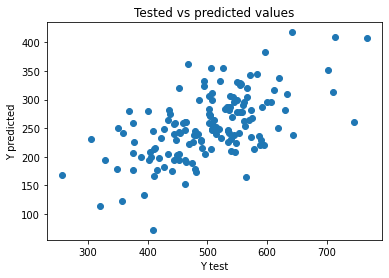

In [ ]:
plt.scatter(y_test, y_predicted)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

V.Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
y_pred = y_predicted.T
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()

MAE:  247.63005489488336
MSE:  66019.78950470513
RMSE:  256.9431639579172
R2:  -8.095158617841646



# 9 Mini-batch Gradient descent
I. Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.
<br/>
Answer: At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on 
just one instance (as in Stochastic GD), Minibatch GD computes the gradients on minibatches. This boosts performance over SGD.

#10 Polynomial of degree 2 
I. Use sklearn's Polynomial features to degree = 2 on our training and test set
II. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#II
X_poly = poly_features.fit_transform(X_train_scaled)
lin_reg2 = LinearRegression() 
lin_reg2.fit(X_poly,y_train)
lin_reg2.intercept_, lin_reg2.coef_


(499.0863908102495,
 array([27.43133612, 39.01541158, -2.84765496, -0.06806448,  0.22628951,
        -4.14695629, -0.42542096,  2.69791039,  0.99147184]))

III. Predict for test set

In [ ]:
X_poly_test = poly_features.fit_transform(X_test_scaled)
Y_pred = lin_reg2.predict(X_poly_test)
print(Y_pred)

[593.43097702 399.35166902 413.25674259 537.64824089 495.97219941
 532.9827873  525.63955971 624.30993341 512.93679291 498.39904503
 447.48908717 575.70305186 541.62572796 472.83771752 659.24651072
 505.20794355 571.04715452 513.06293718 578.82212607 561.3093652
 361.95835189 539.15819974 560.76843788 474.82594262 514.99407589
 423.67239034 538.93827805 526.32673648 541.6172     461.38401371
 566.59336355 649.23755298 571.79544601 534.12508347 510.91235422
 494.8506476  476.44518518 472.69626266 539.2098739  514.54122466
 493.06609841 452.08462915 545.08679226 490.88484827 548.43285392
 537.56675694 512.88208445 554.02261126 397.15058261 480.09668114
 465.46161452 511.90474828 427.1896119  469.02662416 431.57601154
 479.67107059 482.72028198 398.49495961 489.13794241 514.45569024
 541.53725539 551.75059002 588.57922878 493.68285957 515.6932824
 425.05086336 479.28167495 481.57110507 527.80666898 455.74651441
 572.46052294 490.69178078 464.61113271 523.92637795 523.31885023
 541.0821212

IV. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

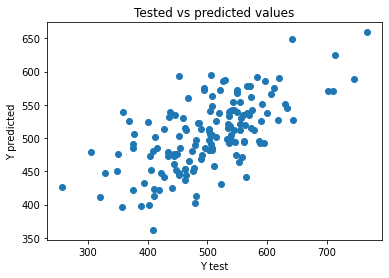

In [ ]:
plt.scatter(y_test, Y_pred)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
y_pred = Y_pred.T
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()

MAE:  49.68998450816467
MSE:  4255.781462150984
RMSE:  65.23635077279373
R2:  0.4137059852580314



# 11  Polynomial of degree 3 
I.Use sklearn's Polynomial features to degree = 3 on our training and test set
II. Use linearRegression on the new polynomial features

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
#II
X_poly = poly_features.fit_transform(X_train_scaled)
lin_reg2 = LinearRegression() 
lin_reg2.fit(X_poly,y_train)
lin_reg2.intercept_, lin_reg2.coef_


(496.84675366669467,
 array([14.08881309, 31.38569479, -7.70431417, -1.86135482, -0.3671433 ,
        -3.37753705,  2.95229394,  2.88367478,  1.49050935,  4.07273838,
         0.67922947, -2.86267476,  2.57433182, -1.38727613,  0.91960673,
         1.67318969,  4.92767421,  0.46158473,  1.0254203 ]))

III. Predict for test set

In [ ]:
X_poly_test = poly_features.fit_transform(X_test_scaled)
Y_pred = lin_reg2.predict(X_poly_test)
print(Y_pred)

[672.89762882 422.78123008 401.05127689 528.12221632 497.03227958
 523.58994461 520.31220042 656.19182151 518.64288349 497.71702736
 457.58170956 570.6724995  555.06818223 474.98684981 755.24986338
 508.47132321 564.22762584 510.8930611  577.33523041 575.13340993
 183.99337882 533.23700838 544.39481621 481.3868519  516.22392618
 441.96984519 532.95212253 528.80655061 539.43921151 461.75626791
 580.57332622 714.6415123  559.24761494 541.17154658 503.65354564
 485.60987209 474.60839612 482.12795084 531.11195081 515.19209822
 492.05474947 450.04920653 545.86491082 498.17174125 545.60157044
 533.39539797 499.53432528 558.3559032  376.77356798 489.46544127
 471.52553046 501.22391026 428.24975834 473.86753839 453.97091424
 480.61803965 481.51221457 433.13164229 486.27060351 511.87752536
 548.70040022 543.73034772 597.32142931 492.48936576 516.99560992
 434.22054384 477.05256692 482.78428055 524.90324035 463.75700952
 563.11770286 486.39467612 467.87848463 513.46528932 513.43973261
 545.49256

IV. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

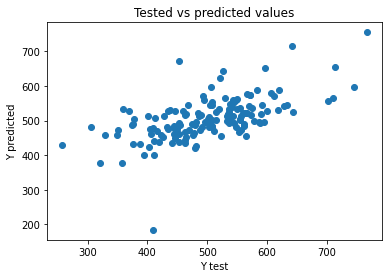

In [ ]:
plt.scatter(y_test, Y_pred)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
y_pred = Y_pred.T
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()

MAE:  51.81246260142063
MSE:  4751.032024744094
RMSE:  68.92773044823174
R2:  0.3454782242161907



# 12 Learning Curve
I. Generate learning curve with linearRegression

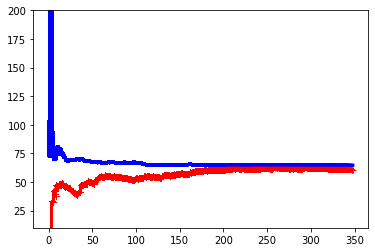

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
      model.fit(X_train[:m], y_train[:m])
      y_train_predict = model.predict(X_train[:m])
      y_val_predict = model.predict(X_test)
      train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
      val_errors.append(mean_squared_error(y_test, y_val_predict))
      plt.ylim(10, 200)
      plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
      plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, Y)


II. Generate learning curve with polynomial regression with degree  = 5

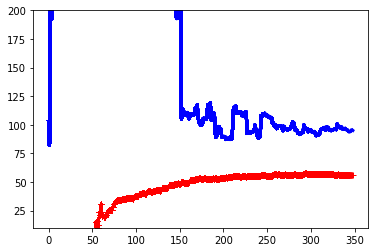

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([ 
("poly_features", PolynomialFeatures(degree=5,  
include_bias=False)), 
("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, Y)

III. Interpret the result
<br/>
Answer:  The first graph, the validation error is relatively high, Both curves reaqched plataeu; they are very close to each other. Underfit
The second graph has a error on the training is higher than on the fortst graph, but for test the error is slightly lower. There is gap between the curves.This looks like overfitting. 

# 13 Regularization
I. Explain the purpose of regularization
<br/>
Answer: Regularization is a way to contrain a model to make it simpler ade reduce overfitting


In [ ]:
# set polynomial degree to 3
poly_features = PolynomialFeatures(degree=3, include_bias=False)

# 14. Ridge Regression
I. Use sklearn's Ridge to train the data set (use the polynomial degree 3 data set)

In [ ]:
from sklearn.linear_model import Ridge
X_reg = poly_features.fit_transform(X_train_scaled)
ridge_reg = Ridge(alpha=1, solver="cholesky") #Cholesky uses a variant of the close form
ridge_reg.fit(X_reg, y_train)


Ridge(alpha=1, solver='cholesky')

II.Predict for test set

In [ ]:
X_test_scaled = poly_features.fit_transform(X_test_scaled)
Y_pred = ridge_reg.predict(X_test_scaled)
print(Y_pred)

[673.01177307 421.95960664 401.17455364 527.83240846 497.02119877
 523.29231901 520.36349992 657.21222864 518.70797308 497.73623758
 457.94562969 570.28492321 554.9500523  475.18563495 757.53892583
 508.2708328  563.83642554 510.73957467 576.97094647 574.95907463
 182.25742383 532.9097574  544.46959534 481.53963246 515.96317594
 442.26769069 532.55814787 528.70759112 539.04629425 461.65875204
 580.27955391 716.38484472 558.89364605 541.1004894  503.61474696
 485.66963839 474.77978408 482.23514856 530.6930908  515.07084641
 492.11295225 449.9017088  545.69215579 498.08482662 545.35354012
 533.21971677 499.72752974 558.03976689 376.56968913 489.43966314
 471.83590979 501.15112809 428.56109241 474.1568924  454.17604301
 480.83178136 481.56087697 432.84812434 486.42944041 511.65678775
 548.45777177 543.32227978 598.27658387 492.44037604 516.77884753
 434.59379347 477.27193421 482.69181305 524.67879051 464.12417603
 562.77658375 486.52594469 468.1518041  513.23102405 513.3716717
 545.153621

III.Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

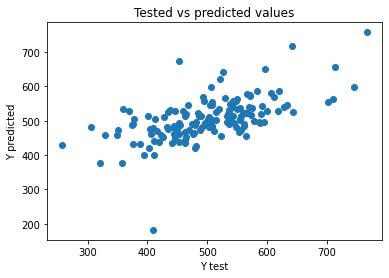

In [ ]:
plt.scatter(y_test, Y_pred)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
mae = sklearn.metrics.mean_absolute_error(y_test, Y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, Y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, Y_pred)
print("R2: ", r2)
print()

MAE:  51.798058890578616
MSE:  4757.34572598873
RMSE:  68.97351467040613
R2:  0.3446084226806747



# 15. SGDRegressor  for Ridge 
I. Use sklearn's SGDRegressor for Ridge Regression

In [ ]:

sgd_reg = SGDRegressor(penalty="l2") #L2
bias_vector = np.ones((350, 1))
x_train = np.append(bias_vector, X_train_scaled, axis=1)

sgd_reg.fit(x_train, y_train)

print("Coefficients: ", sgd_reg.coef_)
print("Intercept:", sgd_reg.intercept_)


Coefficients:  [249.69330345  28.04999047  39.0688048   -2.82950226]
Intercept: [250.01752095]


II. Predict for test set

In [ ]:
bias_vector = np.ones((150, 1))
X_test_scaled = scaler.transform(X_test)
x_test = np.append(bias_vector, X_test_scaled, axis=1)
y_pred = sgd_reg.predict(x_test)


III.Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

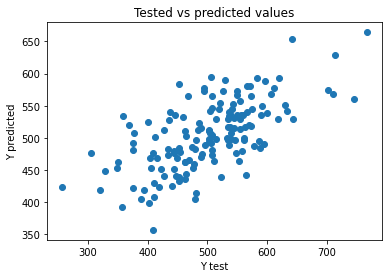

In [ ]:
plt.scatter(y_test, y_pred)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

IV.Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()

MAE:  48.90778301221489
MSE:  4180.351376691905
RMSE:  64.65563685164585
R2:  0.4240975450759976



# 16. Lasso Regression
I. Use sklearn's Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

print("Coefficients: ", lasso_reg.coef_)
print("Intercept:", lasso_reg.intercept_)

Coefficients:  [27.80929476 38.84650451 -2.9402167 ]
Intercept: 499.7231164913073


II.Predict for test set

In [ ]:
y_pred = lasso_reg.predict(X_test_scaled)
print(y_pred)

[582.44105007 398.43363177 408.70246175 537.79920866 495.29319228
 533.49202175 535.53541916 627.91480814 502.31394563 496.37982212
 448.04634026 577.12530652 530.63056384 468.29486886 663.21387375
 507.62827161 568.34406154 512.67025602 580.89227005 564.32615579
 357.81095092 534.87216107 564.75382486 475.53897833 517.87333999
 429.36243385 539.93437842 519.40528705 544.81416908 451.0774706
 567.8923903  652.37546986 572.97149093 519.3924437  510.44052876
 500.01790611 468.48004463 473.05952692 539.56948159 511.09088949
 485.13806096 441.12331148 540.82995179 492.32264425 545.73197522
 544.54831253 488.19880543 551.61431674 393.55615822 486.09227921
 466.33839009 513.34479321 424.54568877 470.05990653 439.91704065
 476.74042894 472.55537419 405.337221   483.16416826 512.83921384
 536.6415585  548.78259955 560.03760226 497.50353273 516.31845576
 425.37631998 482.75077124 493.57940901 530.00261844 459.86139117
 571.98443675 492.24804462 463.45097379 524.18665054 522.30815308
 541.335412

III. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

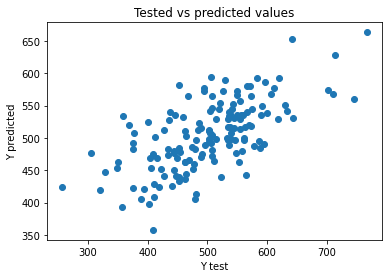

In [ ]:
plt.scatter(y_test, y_pred)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()

MAE:  48.912328560690135
MSE:  4183.0253107850795
RMSE:  64.67631182113803
R2:  0.4237291728819398



V.How Lasso perform the regularization and how does that affect the thetas?
<br\> Answer: Lasso Regression automatically performs feature selection and outputs a sparse model. The majority of the coefficients are exactly zero

# 17. Elastic Net
I. Use sklearn's ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_scaled)

II. Predict for test set

In [ ]:
print(y_pred)

[575.73929742 407.62100128 416.79426198 534.66037857 495.7702583
 530.66825493 532.16303073 617.12972969 501.70510365 496.83838473
 452.49944758 570.49719162 528.43094337 470.66750668 649.2426329
 506.79143112 562.21157247 511.65902031 573.9065535  558.84483517
 370.15585822 531.560411   559.53314915 477.59128417 516.08636366
 435.39837269 536.49240505 518.07197272 540.85981956 455.83101706
 562.13379633 639.35221162 566.67475963 517.21780463 509.71830565
 500.30598968 470.73923546 475.15088137 535.96776571 510.3115266
 485.97160217 446.73072479 537.64842809 492.71806461 541.59169323
 540.47017352 488.48794861 547.38640996 402.28415497 487.02130356
 469.16108539 512.19507904 430.71365297 472.59574017 445.15737913
 478.4770222  475.42632974 413.72401478 484.91551865 511.45593924
 533.75095275 544.28577257 553.99603187 497.66930307 514.94820509
 431.82528601 484.39237633 494.43356573 527.04086603 463.33068198
 565.66066262 492.97589822 466.88630994 522.00955911 520.67416549
 537.85973528

III.Generate a scatter plot that shows the Y test in x axis and y predicted in y axis

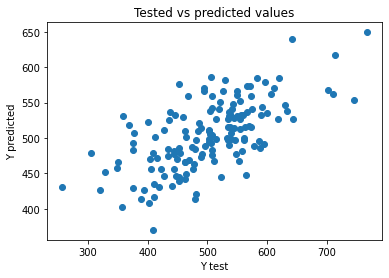

In [ ]:
plt.scatter(y_test, y_pred)
plt.title("Tested vs predicted values")
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE and R^2  (see documentation of sklearn's metrics)

In [ ]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2: ", r2)
print()

MAE:  48.92783057486721
MSE:  4224.743992879839
RMSE:  64.99803068462798
R2:  0.4179818350938951



V. How ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?
Similarly to Lasso regularization is reduces the useless feature's weights down to zero, which the Ridge doesn;t do, but Lasso is more chaotic with big number of features, or when the features are strongly correlated

In [ ]:

print("Coefficients: ", elastic_net.coef_)
print("Intercept:", elastic_net.intercept_)

Coefficients:  [25.39232765 35.5374299  -2.43563182]
Intercept: 499.7231164913072
